In [3]:
import numpy as np
from typing import Tuple
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV

In [4]:
# Load the data and label
def load_data(filename: str) -> Tuple[np.ndarray, np.ndarray]:
    data = np.load(f'{filename}')
    return data['data'], data['labels']
# Split the data and labels into training and testing sets
train_data, train_labels = load_data('train_data_SYN.npz')
print(train_data.shape)
print(np.unique(train_labels, return_counts=True))
test_data, test_labels = load_data('test_data_SYN.npz')
print(test_data.shape)
print(np.unique(test_labels, return_counts=True))
x_train = train_data
y_train = train_labels
x_test = test_data
y_test = test_labels

(5000, 1024)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([563, 633, 529, 482, 486, 456, 504, 486, 442, 419]))
(5000, 1024)
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), array([483, 539, 539, 484, 490, 526, 483, 506, 471, 479]))


In [5]:
# LINEAR KERNEL
svc = SVC(kernel='linear')
svc.fit(x_train, y_train)
y_pred = svc.predict(x_test)

              precision    recall  f1-score   support

           0       0.84      0.93      0.88       483
           1       0.85      0.87      0.86       539
           2       0.89      0.93      0.91       539
           3       0.78      0.83      0.81       484
           4       0.86      0.89      0.87       490
           5       0.86      0.83      0.85       526
           6       0.84      0.83      0.84       483
           7       0.91      0.90      0.91       506
           8       0.84      0.73      0.78       471
           9       0.90      0.83      0.87       479

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



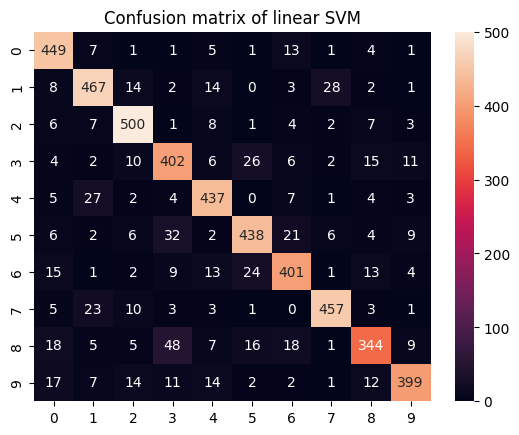

In [6]:
# confusion matrix, precision, recall, F1 score
cm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm, annot=True, fmt='d').set_title('Confusion matrix of linear SVM')
print(classification_report(y_test,y_pred))

In [17]:
# RBF KERNEL
svc_rbf = SVC(kernel='rbf')
svc_rbf.fit(x_train, y_train)
y_pred_rbf = svc_rbf.predict(x_test)

              precision    recall  f1-score   support

           0       0.89      0.95      0.92       483
           1       0.87      0.90      0.88       539
           2       0.90      0.95      0.92       539
           3       0.88      0.87      0.87       484
           4       0.93      0.93      0.93       490
           5       0.93      0.85      0.89       526
           6       0.88      0.89      0.89       483
           7       0.91      0.95      0.93       506
           8       0.89      0.81      0.85       471
           9       0.92      0.87      0.90       479

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



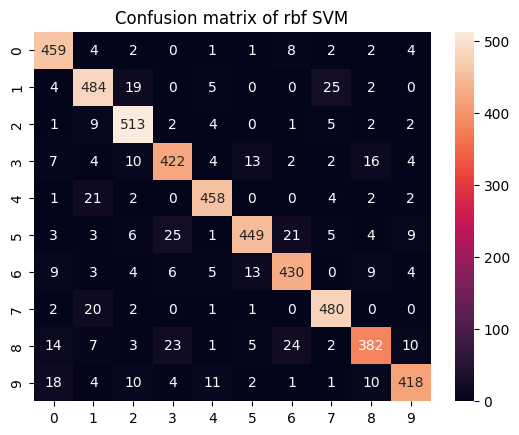

In [18]:
# RBF KERNEL
cm_rbf = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_rbf, annot=True, fmt='d').set_title('Confusion matrix of rbf SVM')
print(classification_report(y_test,y_pred_rbf))

In [7]:
# POLYNOMIAL KERNEL
svc_poly = SVC(kernel='poly')
svc_poly.fit(x_train, y_train)
y_pred_poly = svc_poly.predict(x_test)

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       483
           1       0.67      0.91      0.77       539
           2       0.85      0.94      0.89       539
           3       0.88      0.84      0.86       484
           4       0.94      0.90      0.92       490
           5       0.92      0.84      0.88       526
           6       0.89      0.83      0.86       483
           7       0.93      0.89      0.91       506
           8       0.87      0.80      0.83       471
           9       0.95      0.80      0.87       479

    accuracy                           0.87      5000
   macro avg       0.88      0.86      0.87      5000
weighted avg       0.88      0.87      0.87      5000



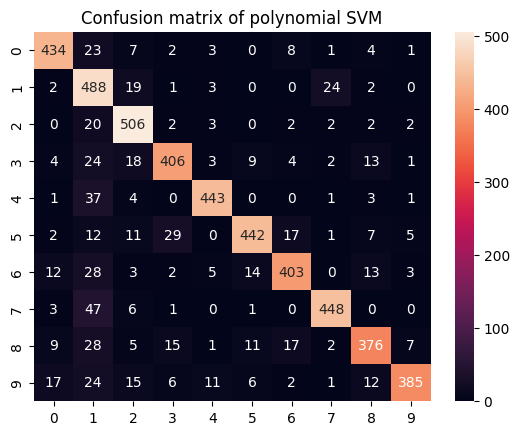

In [8]:
# POLYNOMIAL KERNEL
cm_poly = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_poly, annot=True, fmt='d').set_title('Confusion matrix of polynomial SVM')
print(classification_report(y_test,y_pred_poly))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       563
           1       1.00      1.00      1.00       633
           2       1.00      1.00      1.00       529
           3       1.00      1.00      1.00       482
           4       1.00      1.00      1.00       486
           5       1.00      1.00      1.00       456
           6       1.00      1.00      1.00       504
           7       1.00      1.00      1.00       486
           8       1.00      1.00      1.00       442
           9       1.00      1.00      1.00       419

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



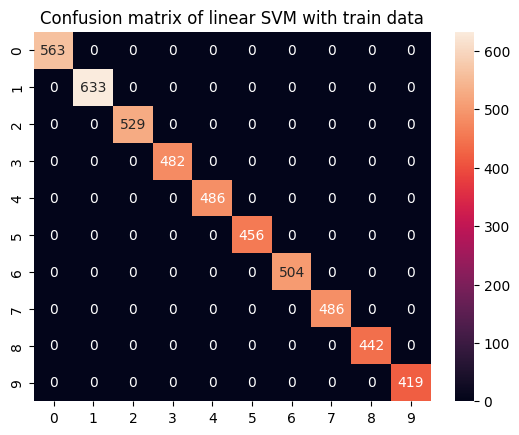

In [19]:
# check for overfitting
y_pred_train = svc.predict(x_train)

cm_train = confusion_matrix(y_train,y_pred_train)
sns.heatmap(cm_train, annot=True, fmt='d').set_title('Confusion matrix of linear SVM with train data')

print(classification_report(y_train,y_pred_train))

In [25]:
svc.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'linear',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [9]:
# The C Hyperparameter
for i in range(4):
    c = 10 * pow(10, -(i))
    svc_c = SVC(kernel='rbf', C=c)
    svc_c.fit(x_train, y_train)
    y_pred_c = svc_c.predict(x_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"with C = {c}, accuracy is {accuracy}")

###### C is 10 ######
0.9018
###### C is 1.0 ######
0.899
###### C is 0.1 ######
0.7238
###### C is 0.01 ######
0.173


In [10]:
# BEST SVM
svc_best = SVC(kernel='rbf', C=10)
svc_best.fit(x_train, y_train)
y_pred_best = svc_best.predict(x_test)

              precision    recall  f1-score   support

           0       0.88      0.95      0.92       483
           1       0.88      0.90      0.89       539
           2       0.90      0.95      0.92       539
           3       0.88      0.88      0.88       484
           4       0.91      0.93      0.92       490
           5       0.92      0.87      0.89       526
           6       0.89      0.89      0.89       483
           7       0.92      0.94      0.93       506
           8       0.90      0.82      0.86       471
           9       0.93      0.88      0.90       479

    accuracy                           0.90      5000
   macro avg       0.90      0.90      0.90      5000
weighted avg       0.90      0.90      0.90      5000



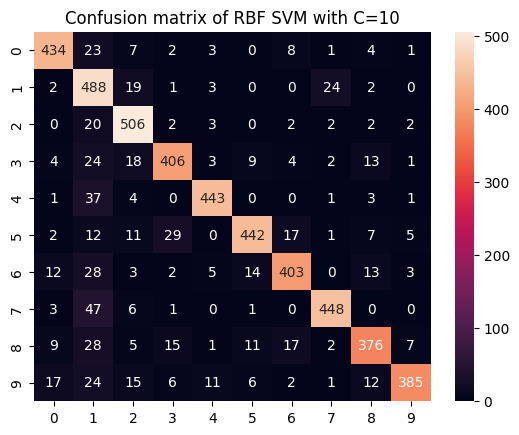

In [11]:
# BEST SVM
cm_best = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_best, annot=True, fmt='d').set_title('Confusion matrix of RBF SVM with C=10')
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       563
           1       1.00      1.00      1.00       633
           2       1.00      1.00      1.00       529
           3       1.00      1.00      1.00       482
           4       1.00      1.00      1.00       486
           5       1.00      1.00      1.00       456
           6       1.00      1.00      1.00       504
           7       1.00      1.00      1.00       486
           8       1.00      1.00      1.00       442
           9       1.00      1.00      1.00       419

    accuracy                           1.00      5000
   macro avg       1.00      1.00      1.00      5000
weighted avg       1.00      1.00      1.00      5000



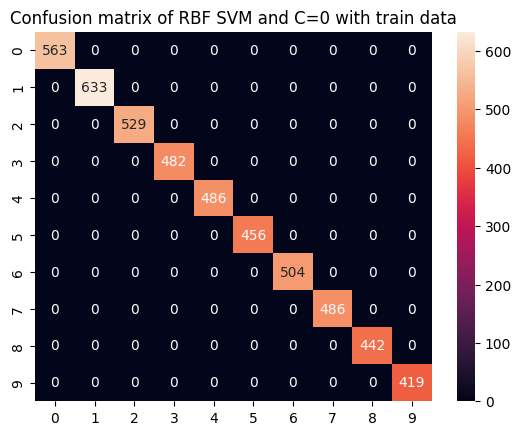

In [13]:
# check for overfitting
y_pred_train_best = svc_best.predict(x_train)
cm_train_best = confusion_matrix(y_train,y_pred_train_best)
sns.heatmap(cm_train_best, annot=True, fmt='d').set_title('Confusion matrix of RBF SVM and C=10 with train data')
print(classification_report(y_train,y_pred_train_best))